In [1]:
##This project is about targeting the bank customers to opt for personal laon
'''
Campaign for selling personal loans

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these
customers are liability customers (depositors) with varying size of deposits. The number of customers
who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this
base rapidly to bring in more loan business and in the process, earn more through the interest on
loans. In particular, the management wants to explore ways of converting its liability customers to
personal loan customers (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the
retail marketing department to devise campaigns with better target marketing to increase the success
ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have
higher probability of purchasing the loan. This will increase the success ratio while at the same time
reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic
information (age, income, etc.), the customer&#39;s relationship with the bank (mortgage, securities
account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among
these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the
earlier campaign.

DataSet-Bank_Personal_Loan_Modelling.csv

Column Descrition - TheraBank_Column_Description.xlsx

1. Read the column description and ensure you understand each attribute well

2. Study the data distribution in each attribute, share your findings. (10 points)

3. Get the target column distribution.

4. Split the data into training and test set in the ratio of 70:30 respectively

5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a
liability customer buying personal loans (30 points)

6. Print the confusion matrix for all the above models (10 points)

7. Give your reasoning on which is the best model in this case and why it performs better? (10 points)'''

In [1]:
#1. Read the column description and ensure you understand each attribute well
    #Import all the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [128]:
Bank_df = pd.read_csv("D:/AIML-GL/Residency3/Project/Bank_Personal_Loan_Modelling.csv")
Bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
#Analyse if there is any missing value in any row, data type and shape(no of rows and columns)
Bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [122]:
Bank_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [64]:
Bank_df.describe()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [80]:
#Drop ZIP code column
Bank_df= Bank_df.drop('ZIP Code',axis=1)
Bank_df.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


In [81]:
Neg_Exp= Bank_df[Bank_df['Experience']<0].count()
Neg_Exp

ID                    52
Age                   52
Experience            52
Income                52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal Loan         52
Securities Account    52
CD Account            52
Online                52
CreditCard            52
dtype: int64

In [231]:
#Convert negative experience into positive (ie absolute numbers) as experience can never be -ve
Bank_df['Experience'] = Bank_df['Experience'].abs()

In [87]:
#Validate if all negative experience are converted in to postive
Bank_df[Bank_df['Experience']<0].count()

ID                    0
Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

C:\Users\Sandhyash\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Sandhyash\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


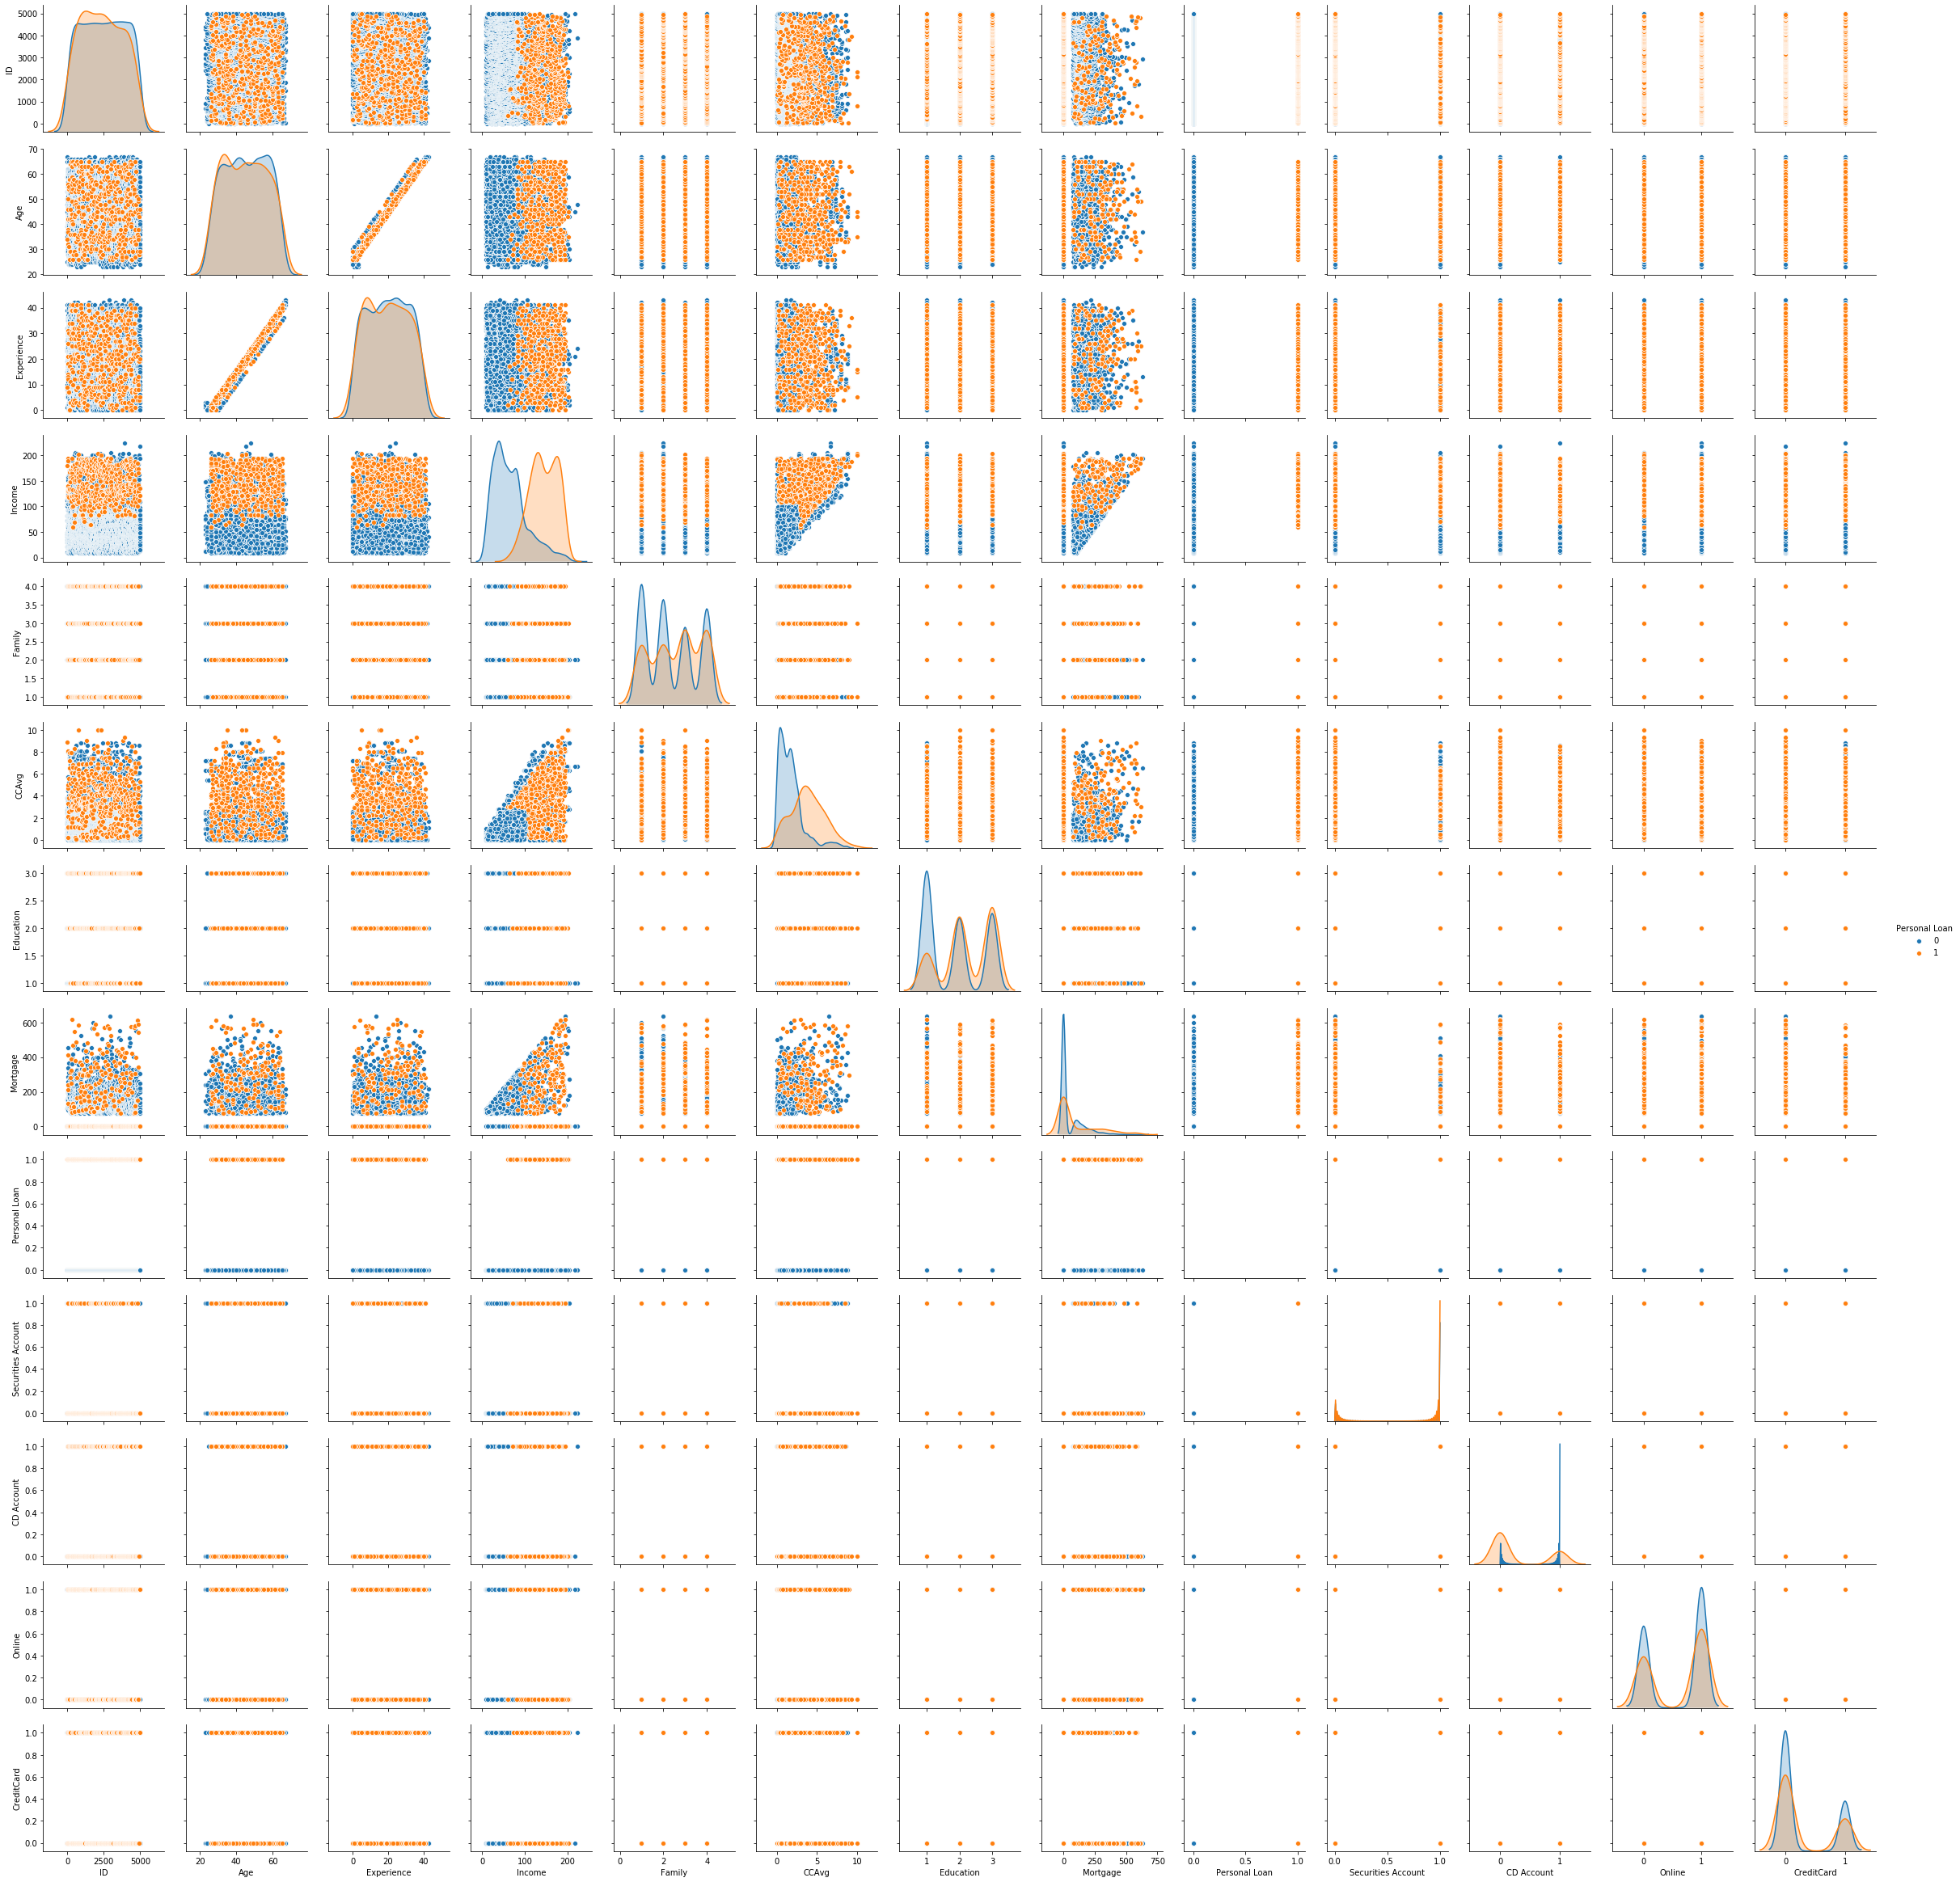

In [88]:
#2. Study the data distribution in each attribute, share your findings. (10 points)
sns.pairplot(Bank_df, diag_kind="kde",hue="Personal Loan")
#sns.pairplot(Bank_df, hue= "Class")

In [126]:
#Provide insights about the data visualization
##1. After looking at the above data visualization we can infer that income and CCAvg attiributes are good features which can help to predict potential customer for selling personal loan.
#Reason: As they are making a separate bell curve with small overlap. 

In [ ]:
#A strong correlation can also be seen between income and CCAvg with the help of heatmap shown below

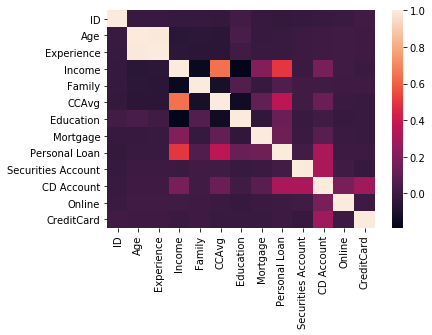

In [89]:
sns.heatmap(Bank_df.corr(), )#annot=True) #Income and CCAvg spend have strong corelation

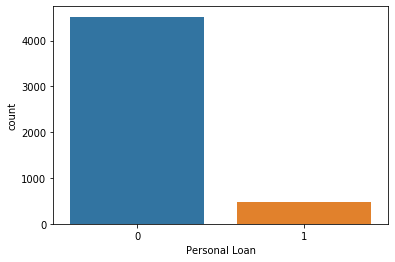

In [91]:
##3. Get the target column distribution.
sns.countplot(x='Personal Loan',data=Bank_df)

In [112]:
Bank_df.sample()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1303,1304,29,5,112,2,2.0,2,382,0,1,0,0,0


In [92]:
#Separate target column class(ie. Loan column). Customer will take a loan or not based on the data provided
X=Bank_df.drop('Personal Loan',axis=1)
y=Bank_df['Personal Loan']

In [210]:
##4. Split the data into training and test set in the ratio of 70:30 respectively
from sklearn.model_selection import train_test_split
test_size = 0.30 # taking 70:30 training and test set
seed = 6 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [211]:
#5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the 
#likelihood of a liability customer buying personal loans (30 points)
# AND
#6. Print the confusion matrix for all the above models (10 points)
# calculate accuracy measures and confusion matrix

In [212]:
#1. Logistic Model
from sklearn.linear_model import LogisticRegression
Model=LogisticRegression()
Model.fit(X_train,y_train)

C:\Users\Sandhyash\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [213]:
#LR-Predict 
LRpredict=Model.predict(X_test)
Trainaccuracy=Model.score(X_train,y_train)
print(Trainaccuracy)
Testaccuracy=Model.score(X_test,y_test)
print("Score of LR on test data is:",Testaccuracy)

0.9485714285714286
Score of LR on test data is: 0.9526666666666667


In [214]:
#LR-Confusion matrix
from sklearn.metrics import f1_score,classification_report,confusion_matrix
print(f1_score(y_test,LRpredict))
print("\n")
print(confusion_matrix(y_test,LRpredict))
print("\n")
print(classification_report(y_test,LRpredict))

0.7215686274509804


[[1337   21]
 [  50   92]]


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1358
           1       0.81      0.65      0.72       142

    accuracy                           0.95      1500
   macro avg       0.89      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500



In [215]:
#2. KNN Model
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [220]:
#when n_neighbours = 3
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(X_train, y_train) 
KNNpredict = classifier.predict(X_test)  
from sklearn.metrics import accuracy_score
print("Accuracy of KNN is:", accuracy_score(y_test, KNNpredict))

#Change n_neighbour=3,5,6 and try to get best 

Accuracy of KNN is: 0.954


In [218]:
#when n_neighbours = 5
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 
KNNpredict = classifier.predict(X_test)  
from sklearn.metrics import accuracy_score
print("Accuracy of KNN is:", accuracy_score(y_test, KNNpredict))

#Change n_neighbour=3,5,6 and try to get best 

Accuracy of KNN is: 0.9533333333333334


##### KNN-Predict

In [226]:
#KNN-Predict 
KNNpredict=Model.predict(X_test)
Trainaccuracy=Model.score(X_train,y_train)
print(Trainaccuracy)
Testaccuracy=Model.score(X_test,y_test)
print(Testaccuracy)

0.8808571428571429
0.89


In [222]:
#KNN-Confusion matrix
from sklearn.metrics import f1_score,classification_report,confusion_matrix
print("f1 score is: ", f1_score(y_test,KNNpredict))
print("\n")
print("Confusion metrics is :", confusion_matrix(y_test,KNNpredict))
print("\n")
print(classification_report(y_test,KNNpredict))

f1 score is:  0.3313609467455621


Confusion metrics is : [[1077  281]
 [  58   84]]


              precision    recall  f1-score   support

           0       0.95      0.79      0.86      1358
           1       0.23      0.59      0.33       142

    accuracy                           0.77      1500
   macro avg       0.59      0.69      0.60      1500
weighted avg       0.88      0.77      0.81      1500



In [223]:
#3. NB Model
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [224]:
#NB-Predict
NBpredict=Model.predict(X_test)
Trainaccuracy=Model.score(X_train,y_train)
print("Training data accuracy is:", Trainaccuracy)
Testaccuracy=Model.score(X_test,y_test)
print("Test data accuracy is: ", Testaccuracy)

Training data accuracy is: 0.8808571428571429
Test data accuracy is:  0.89


In [228]:
#calculate F1 score, accuracy measures and confusion matrix
#print(classification_report(y_test,NBpredict))
#print(confusion_matrix(y_test,NBpredict))

In [227]:
#KNN-Confusion matrix
from sklearn.metrics import f1_score,classification_report,confusion_matrix
print("f1 score is: ", f1_score(y_test,NBpredict))
print("\n")
print("Confusion metrics is :", confusion_matrix(y_test,NBpredict))
print("\n")
print(classification_report(y_test,NBpredict))

f1 score is:  0.5045045045045046


Confusion metrics is : [[1251  107]
 [  58   84]]


              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1358
           1       0.44      0.59      0.50       142

    accuracy                           0.89      1500
   macro avg       0.70      0.76      0.72      1500
weighted avg       0.91      0.89      0.90      1500



In [ ]:
#7. Give your reasoning on which is the best model in this case and why it performs better? (10 points)

In [ ]:
Below are the finding for all the models

	Score	Precision	Recall
    
LR	.952	.96		.98
KNN	.954	.95		.79
NB	.89	.96		.92

After analysing all the above 3 models. we can conclude Logistic regression is the best model as compared to KNN and NB as it's score, precision and recall values are on the higher end.